## GPT-3.5を使用したエッセイ生成

モデル や max_tokens やプロンプト中での文字数指定を変えた場合に、出力の分量はどうなるか

In [1]:
# openai python ライブラリーをインストールしていない場合はこれを実行してください。
! pip install openai

In [2]:
import openai
openai.api_key = input("openai API key:")


In [3]:
# gpt-3.5-turbo だと、入力＋出力で4096トークン（日本語で4000文字〜5000文字）まで
# 以下のようなMoodle小テスト問題生成だと４問くらいが限界
# model ="gpt-3.5-turbo-0613"
# model ="gpt-3.5-turbo"
# max_tokens=1000

# gpt-3.5-turbo-16k だと、入力＋出力で16000トークン（日本語で1.6万文字くらい）まで
# 利用料は２倍高い https://openai.com/pricing
#model="gpt-3.5-turbo-16k"
#max_tokens=8000

#model="gpt-4"
#max_tokens=4000

openai.ChatCompletion.createメソッドのパラメータ：
- model (必須): 使用するモデルのIDを指定します。例えば、"gpt-3.5-turbo"です。
- messages (必須): チャット対話のリストを含むオブジェクトです。各メッセージはrole（"system"、"user"、または"assistant"）とcontent（メッセージのテキスト）を含む辞書として表されます。対話の開始時には、システムメッセージが推奨されます。
- max_tokens (オプション): 応答の最大トークン数を制限します。
- temperature (オプション): モデルの応答の多様性を制御します。値が低いほど、より決定論的な応答が生成されます（0.0に近づくほど決定的になります）、高いほどランダムな応答が生成されます（1.0に近づくほどランダムになります）。
- n (オプション): 応答の候補として生成するトークンの数を制御します。値を増やすと、より多くの応答が生成されますが、処理時間が増える可能性があります。
- stop (オプション): モデルの生成を停止するためのトリガーテキストを指定します。
- logprobs (オプション): 応答のトークンごとの対数確率を返すかどうかを制御します。

In [4]:
import time
import pandas as pd
    
def get_essay1(prompt, model, max_tokens):
    response = openai.ChatCompletion.create(
        model = model,
        max_tokens = max_tokens,
        messages=[
            {"role": "user", "content": prompt},
        ],
    )
    res = response.choices[0]["message"]["content"].strip()
    return res

In [21]:
import matplotlib.pyplot as plt
def dplot(df1, xx, yy, yy2, xlabel, ylabel, ylabel2):

    data = df1[[xx, yy, yy2]]
    fig, ax1 = plt.subplots()

    ax1.scatter(data[xx], data[yy], color='b', label=ylabel)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel, color='b')
    ax1.plot([0,2500], [0,2500], color='blue', linestyle='--', label='y = x')

    ax1.set_xlim(0, 2700)
    ax1.set_ylim(0, 2500)
    ax1.set_xticks(range(0, 2501, 250))
    ax1.set_yticks(range(0, 2501, 250))

    ax2 = ax1.twinx()
    ax2.scatter(data[xx], data[yy2], color='r', label=ylabel2)
    ax2.set_ylabel(ylabel2, color='r')
    ax2.set_ylim(0, 90)

    ax1.grid(True)

    ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
    ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))

    plt.tight_layout()
    plt.show()

In [ ]:
data1 = []
res1 =  {}
for num in range(250,2501,250):
    max_tokens = 8000
    prstr1 = f"データサイエンス倫理の重要性について大学生に丁寧に説明する{num}文字程度の長文のエッセイを書いてください。"
    for i in range(10):
        now0 = time.time()
        res1[num] = get_essay1(prstr1, "gpt-3.5-turbo-16k", max_tokens)
        res_len = len(res1[num])
        # print(res1[num])
        now = time.time()
        print("# （改行文字など含む）文字数: %d / %d (%f) %d" % ( res_len, num, now-now0, i ))
        data1.append([num, i, res_len, now-now0])

# print(data1)                     
df1 = pd.DataFrame(data1, columns=['指定文字数', 'trials', '出力文字数', '秒数'])

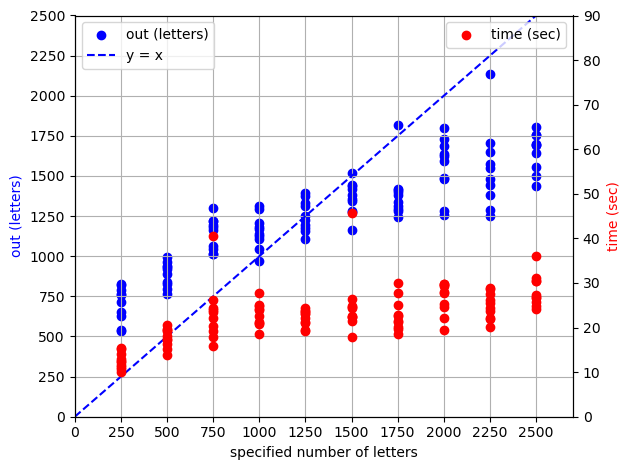

In [27]:
dplot(df1,'指定文字数','出力文字数','秒数', 'specified number of letters', 'out (letters)', 'time (sec)')

In [8]:
res1[250]

'データサイエンスは、情報技術の急速な発展により、我々の社会においてますます重要な役割を果たしています。しかしこの分野には、倫理的な問題も存在しています。データサイエンス倫理がなぜ重要なのかを大学生に伝える必要があります。\n\nまず、データサイエンスの倫理が重要である一つの理由は、人々のプライバシーを保護するためです。データサイエンスは、個人のデータを収集、分析し、予測する能力を持っています。しかし、このプロセスは、個人のプライバシーを侵害する可能性も孕んでいます。データサイエンティストは、この個人情報を適切に保護し、悪用しないようにする責任を持っています。\n\nさらに、データサイエンスにおける倫理は、フェアネスとバイアスの問題にも関連しています。データは、いくつかの要因や視点に基づいて収集され、分析されます。しかし、このプロセスにおいて、はっきりとしたバイアスが存在する場合、結果も偏る可能性があります。例えば、特定の人種や性別に対して公正でない判断が下される恐れがあります。データサイエンス倫理は、バイアスを排除し、フェアな結果を提供するためのガイドラインを作ることが重要です。\n\n最後に、データサイエンス倫理は、社会への影響も考慮し、責任を負う必要があります。データサイエンティストは、彼らの研究や分析が社会全体にどのような影響を与えるかを理解し、それに応じて行動する義務があります。例えば、政府や企業による監視や差別的な行動のためにデータを使用する場合、データサイエンティストは自身の価値観と倫理に基づいて判断を下す必要があります。\n\nデータサイエンス倫理の重要性を大学生に説明することは、彼らがプロフェッショナルとして成長する上で不可欠です。彼らが責任を持ち、プライバシーを尊重し、フェアな結果を追求することで、データサイエンスはより良い社会のために働く力になります。'

In [9]:
res1[1000]

'データサイエンスの世界は、私たちの社会においてますます重要な役割を果たしています。データの収集、分析、利用は、ビジネスや政府の意思決定において不可欠なものとなりました。しかし、データサイエンティストやデータ分析者としての私たちの責任は、単にデータの利用だけにとどまりません。データの使用には倫理的な側面が存在し、その重要性を丁寧に説明する必要があります。\n\nまず第一に、個人のプライバシーと保護について考える必要があります。データは、一般の個人に関連性のないかもしれないと思われる情報からも推測されることがあります。個人の性別、年齢、居住地、心理状態、性的嗜好などの個人情報は、単体ではさほど重要ではないかもしれませんが、集合的に分析することによってプロフィールを作成することが可能です。そのため、個人のプライバシーを侵害しないように注意する必要があります。\n\nさらに、データ分析の結果や予測を利用する場合、その結果が個人や社会に与える影響を考慮する必要があります。偏ったデータセットやバイアスのある分析に基づいて意思決定を行うことは、不公平な結果を生み出す可能性があります。例えば、就職や入学に関する意思決定を行う場合、個人の能力や資質だけでなく、性別や人種に基づいた結果になることは好ましくありません。そのため、公正さと平等さを確保するために、データ分析の手法やデータセットの選択に注意を払う必要があります。\n\nまた、データの収集や使用には法的な制約も存在します。個人情報保護法や著作権法などの法律に違反しないようにする必要があります。データを正当な目的以外に使ったり、第三者に提供したりすることは許されません。私たちデータサイエンティストやデータ分析者は、法的な制約を遵守する責任があります。\n\n最後に、データサイエンスの倫理には透明性と説明責任の原則も重要です。私たちは自分の分析手法や結果を他の人に説明し、議論することが求められます。データの正確性、信頼性、利用可能性を確保するために、透明性と説明責任を持つことは必要不可欠です。また、意思決定の根拠や背景を説明することによって、データに基づく意思決定はより信頼性があり、納得感を与えるものとなります。\n\nデータサイエンス倫理は、データの力を最大限に活用することと共に、社会の進歩や公正さを追求するために重要です。デー

In [10]:
res1[1750]

'データサイエンスの進歩と普及によって、私たちはますます多くの情報を集めることができるようになりました。これにより、ビジネスや医療、政治など、さまざまな分野で新たな成果を生み出すことが可能になりました。しかし、データの蓄積と利用は、倫理的な観点からも評価されるべきです。データサイエンス倫理は、データの収集・分析・利用が個人や社会に与える影響を考慮し、責任を持って行動するための指針を提供します。\n\nデータサイエンス倫理の重要性は、個人のプライバシー権と自己決定権を保護することにあります。データは個人に関する情報を含み、その情報はしばしば個人を特定することができます。データサイエンスの進歩により、私たちの行動や嗜好、さらには個人の健康状態までが記録されることはよくあります。しかし、この情報は私たちのプライバシーに関わるものであり、無断で使用されたり公開されたりすることは許されません。データサイエンス倫理は、個人のデータを収集する際には適切な同意を得ること、情報の非識別化を行うこと、データのアクセスに制限を設けることなどを求めます。\n\nまた、データサイエンス倫理は、社会的な偏りや差別を排除するための重要な役割を果たします。データはしばしば社会の不平等を反映します。例えば、人々の経済的地位や人種に基づいてデータが偏ることがあります。このような偏りは、分析結果や予測モデルにも影響を与え、個人や集団に対する不公平な扱いを引き起こす可能性があります。データサイエンス倫理は、データの収集・分析・利用においては公平性と透明性を確保することを求めます。さらに、個人や集団の権利を侵害する選択や行動を避けることも重要です。\n\nさらに、データサイエンス倫理は、技術の進歩と社会の進化のバランスを保つためにも重要です。データサイエンスの技術は急速に進歩しており、新たな機会や利益をもたらしています。一方で、これらの技術が社会に負の影響をもたらす可能性もあります。例えば、個人情報の漏洩やデータの悪用による犯罪、偽情報の拡散などが考えられます。データサイエンス倫理は、倫理的なフレームワークを提供し、技術の利益とリスクをバランスさせるためのガイドラインを提案します。これにより、データサイエンスが社会の進歩と良い結果をもたらすことができるようになります。\n\nデータサイエンス倫理は、データサ

In [11]:
res1[2000]

'データサイエンス倫理の重要性\n\nデータサイエンスは、現代社会においてますます重要な役割を果たしています。データの解析と処理を通じて、優れた意思決定や新たな発見が可能になり、多くの分野で革新が進んでいます。しかし、これらの技術の進歩に伴い、データサイエンティストたちは慎重さと倫理的な行動について十分な考慮を払わなければなりません。なぜなら、データサイエンスには我々の社会と個人の生活に対する深い影響があり、誤った手法や倫理的でない態度が取られると、大きな悪影響を及ぼす可能性があるからです。\n\nまず第一に、データサイエンスの倫理的な行動は、利用するデータの選択と処理方法に関連しています。データサイエンスでは、多くの場合、一般的なポピュレーションからの大量の情報を扱います。しかし、このデータが個人のプライバシーや権利を侵害しないようにするためには、十分な注意が必要です。個人情報を匿名化する、必要最小限のデータを収集する、データセキュリティを確保するなど、データの選択と処理に際しては、法的および倫理的なガイドラインに従わなければなりません。\n\n第二に、データサイエンスの倫理的な行動は、分析結果の解釈と報告にも関連します。データの解析は、多くの場合、特定の予測や結論を導き出すことを目的としていますが、その結果を公正に伝えることが重要です。データサイエンティストは、結果の限界や不確実性を認識し、それらを正確に報告する責任があります。また、個別のグループや個人に対してバイアスをかけることなく、データの解釈を行うことも重要です。公平性、正義、透明性の原則に基づいて、データ分析の結果を報告することは、信頼性と公信性を確保する上で欠かせません。\n\nさらに、データサイエンスの倫理的な行動は、技術の使用と応用にも関連しています。データサイエンスの技術は、犯罪予測、就職や出願のプロセス、広告のパーソナライズなど、様々な領域で広範に利用されています。しかし、これらの技術が偏見や差別を助長する可能性があるため、慎重に使用されるべきです。データ収集やモデルの構築においては、公正性と非差別性を確保するためのメカニズムを導入すべきです。また、技術の実用化に先立ち、社会的影響を評価し、関係者の意見を取り入れることも重要です。\n\nデータサイエンスの倫理的な実践は、現代社会における信頼性

In [12]:
res1[2500]

'データサイエンスは、現代社会においてますます重要性を増しています。そのため、データサイエンスの倫理も同様に重要です。データサイエンス倫理を守ることは、個人と社会のためになるだけでなく、信頼性と透明性をもたらし、健全なデータ産業を促進することにもつながります。\n\nまず、データサイエンス倫理の重要性は、データの収集と使用に関するプロセスの透明性と公正さを確保することです。データは、個人の情報や意見、習慣などを反映しています。データの収集は、信頼関係に基づいて行われるべきであり、個人の同意を得ることが重要です。また、データの使用においても、個人のプライバシーを尊重し、不正確な結果やバイアスのかかった意味を持つ結果を提供することは避けなければなりません。\n\nデータサイエンス倫理を守ることは、社会的な信頼を築くために不可欠です。データは、政府や企業、個人によって様々な目的で使用されます。しかし、データの誤った使用や不正確な解釈が行われると、社会の信頼を損なう可能性があります。例えば、政府や企業が個人のデータを不当に利用し、プライバシーの侵害や差別的な行為を行う場合、個人や一般の人々はデータの利用に対して懐疑的になる可能性があります。一方で、データの収集、分析、使用が公正かつ透明に行われる場合、社会的な信頼が高まります。そのため、データサイエンス倫理は、社会的な影響を最小限に抑え、誠実さと信頼を築くために欠かせません。\n\nさらに、データサイエンス倫理は、バイアスや偏見への対処にも重要です。データは、収集される方法や解釈される方法によってバイアスがかかる可能性があります。例えば、特定の人種や性別、社会的な背景に基づいてデータが収集される場合、結果は不正確であり、一部の人々を差別する可能性があります。データサイエンティストは、バイアスのかかったデータを適切に修正し、公平で包括的な解析結果を提供する責任があります。\n\nデータサイエンス倫理は、個人の権利や社会の利益を守るための規範としても重要です。個人のデータは、彼ら自身についての情報だけでなく、集団としての情報も含んでいます。データは、医療や犯罪対策、社会政策などの重要な意思決定のために使用されることがあります。したがって、データの収集と使用が誤った方法で行われると、個人や社会に大きな影響を与える可能性があります。

In [ ]:
data2 = []
res2 =  {}
for num in range(250,2501,250):
    max_tokens = num
    prstr2 = "データサイエンス倫理の重要性について大学生に丁寧に説明する、なるべく長文のエッセイを書いてください。"
    for i in range(10):
        now0 = time.time()
        res2[num] = get_essay1(prstr2, "gpt-3.5-turbo-16k", max_tokens)
        res_len = len(res2[num])
        # print(res2[num])
        now = time.time()
        print("# （改行文字など含む）文字数: %d / %d (%f) %d" % ( res_len, num, now-now0, i ))
        data2.append([num, i, res_len, now-now0])

# print(data2)                     
df2 = pd.DataFrame(data2, columns=['指定トークン数', 'trials', '出力文字数', '秒数'])

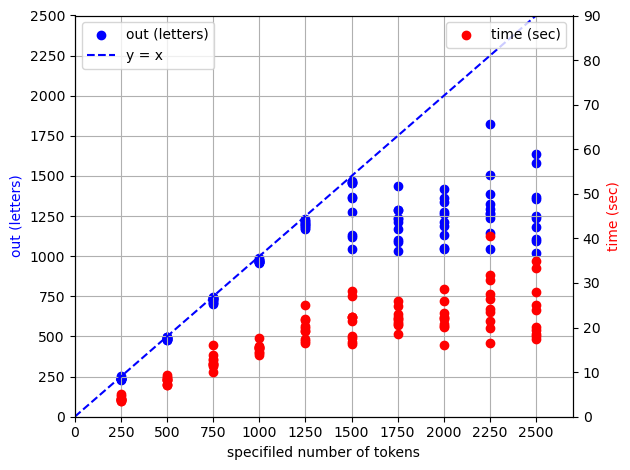

In [25]:
dplot(df2,'指定トークン数','出力文字数','秒数', 'specifiled number of tokens', 'out (letters)', 'time (sec)')

In [15]:
res2[250]

'データサイエンスの進歩は、私たちの社会において様々な利益をもたらしています。データサイエンスは、大量のデータからパターンや傾向を見つけ出し、意思決定や問題解決に役立てることができます。しかし、この進歩には潜在的な危険性も存在します。データの使用方法には多くの倫理的な側面が絡んでいるため、データサイエンスの実践者は倫理的な行動規範を持つことが非常に重要です。\n\nまず第一に、データサイエンス倫理の重要性は、個人のプライバシーと個人情報の保護に関わります。現代社会では、私た'

In [16]:
res2[1000]

'データサイエンスは、現代社会において非常に重要な役割を果たしています。データの量と種類が爆発的に増加し、ビッグデータが様々な分野で活用されるようになっています。しかしながら、データサイエンティストがデータを扱う際には、倫理的な観点からの考慮が欠かせません。なぜなら、データサイエンスの結果や成果が、私たちの生活や社会に深い影響を与える可能性があるからです。\n\nまず第一に考慮しなければならないのは、個人情報の保護とプライバシーです。データサイエンスによって得られるデータには、私たちの個人情報や行動パターンが含まれることがあります。データサイエンティストは、このような個人情報を適切に保護し、不正アクセスや悪用から守る責任があります。また、データの収集や利用に際しては、個人の同意を得る必要があります。適切な情報提供と同意の確認を行わないと、プライバシーの侵害や個人の権利侵害につながる可能性があるため、十分な注意が必要です。\n\n次に、データの偏りやバイアスについての考慮が重要です。データは、収集方法や収集対象の選定方法によって偏ることがあります。例えば、特定の人種や地域に関するデータが不足していたり、特定の社会的背景を持つ人々の声が反映されていない可能性があります。データの偏りやバイアスは、分析結果や予測モデルにも影響を与えるため、その結果に偏りが生じる可能性があります。データサイエンティストは、このような偏りを理解し、適切な修正や対応策を取ることが求められます。\n\nまた、データサイエンスの結果や予測が人々の生活や意思決定に大きな影響を与える場合もあります。例えば、金融機関が信用スコアを予測するためにデータサイエンスを使用する場合、その結果が個人のクレジット履歴や融資へのアクセスに関与することになります。そのような場合、データサイエンティストは、結果の透明性や公平性を確保し、個人への差別や不平等を引き起こさないようにする責任があります。また、データサイエンスの結果や予測は、社会的な偏見や差別を再生産する可能性もあるため、その可能性に対しても十分な意識と配慮が必要です。\n\n最後に、データサイエンス倫理の重要性は、科学的方法と透明性に関連しています。データサイエンティストは、科学的な手法とルールに従って'

In [32]:
res2[1250]

'データサイエンスは、現代社会における非常に重要な分野であり、様々な分野での問題の解決に貢献しています。データサイエンスは、データの収集、分析、解釈などを通じて、意思決定を支援するための情報を提供することに焦点を当てています。しかし、これらの活動は個人や社会に大きな影響を与える可能性があるため、データサイエンス倫理は非常に重要です。\n\nデータサイエンス倫理は、データの収集、保管、分析、共有に関する倫理的な問題について考える学問分野です。データサイエンティストは、個人のプライバシーやセキュリティ、公正さ、バイアスの問題、データの使用に関する倫理的な観点を考慮する必要があります。倫理的な問題に慎重に取り組むことは、信頼性のあるデータ分析や意思決定のために不可欠です。\n\nまず、データ収集においては、個人のプライバシーが重要視されなければなりません。データサイエンティストは、個人の個人情報を適切に保護することが求められます。個人データの収集は、法的な制限に沿って行われ、個人の同意なしには行われないようにする必要があります。また、個人のデータは適切な方法で保存され、不正なアクセスや悪用から保護されるべきです。\n\nさらに、データの分析や解釈においては、公正さが重要です。データサイエンティストは、個人やグループに対して公平な結果や意見を提供する責任があります。バイアスや偏見のない方法でデータを収集し、結果を分析する必要があります。データは、可能な限り客観的な情報源として使用されるべきです。\n\nさらに、データの使用に関しては、倫理的な観点が重要です。データサイエンティストは、データを適切に使用する責任を負っています。データは、他の人を傷つけるために使用されることはあってはならず、意図しない結果や悪影響を与える可能性がないように注意する必要があります。また、データを使用する際には、個人の同意を得るべきです。人々の個人情報やデータを無断で使用することは、倫理的な問題となります。\n\nデータサイエンスにおける倫理は、信頼性と透明性を確保するためにも非常に重要です。データサイエンティストは、その活動と結果を明確に伝える責任があります。データサイエンスの結果や意思決定に使用されるデータや方法論について、他の人が理解できるように説明する必要があります。\n\nデータサイエンス

In [33]:
res2[1500]

'データサイエンスは、現代社会において非常に重要な役割を果たしています。私たちは、データを収集し、分析し、利用することで、さまざまな分野で革新的な解決策を見つけることができます。しかし、データの利用には倫理的な側面も存在し、その重要性を十分に理解しなければなりません。\n\nデータサイエンスの倫理の重要性は、いくつかの側面から考えることができます。まず第一に、データの収集や分析には個人情報やプライバシーの問題が関わっています。私たちは、個人の情報を適切に保護し、悪用や横領から守る責任があります。個人情報を適切に取り扱うことで、信頼関係を築き、利害関係者の権利を守ることができます。\n\nまた、データの利用には公正さや公平性の問題も関わってきます。データの分析結果や予測は、意思決定や政策立案に大きな影響を与える場合があります。そのため、データサイエンティストは、人種、性別、年齢などの属性に基づくバイアスや偏見を避ける責任があります。公平な結果を提供するためには、データの選択や解釈において客観性を保ち、偏見に対処する必要があります。\n\nさらに、データサイエンスの倫理は、社会的な影響に関する問題も考える必要があります。データの利用によって、社会における様々な問題や課題の解決が可能となりますが、同時に新たな社会的な問題も引き起こす可能性があります。例えば、人々のプロフィールや行動パターンに基づいた個別のターゲティング広告は、プライバシーや消費者の選択の自由を制限する可能性があります。このような負の影響を予防するためには、データの利用について常に公共の利益や倫理的立場を考慮しなければなりません。\n\nデータサイエンスの倫理は、個人や企業だけでなく、学術界や政府機関などの組織にとっても重要な要素です。組織は、データの収集と利用におけるガイドラインや規制を策定する必要があります。また、社会全体での議論や倫理的な指針の整備も重要です。\n\n結論として、データサイエンスの倫理は、データの収集、利用、分析における個人情報やプライバシーの保護、公正さや公平性の確保、そして社会的な影響への配慮といった側面を考慮する必要があります。データサイエンスの発展と社会的な進歩を両立させるためには、倫理的な枠組みを構築し、その重要性を理解し、守ることが求められます。データサイエンスの倫理は私た

In [34]:
res2[2000]

'データサイエンスは現代社会において欠かせない領域であり、我々の日常生活やビジネス、政府の意思決定にも深く関与しています。しかし、データサイエンスの進歩と普及には、倫理的な問題や懸念も重要な要素として考慮する必要があります。\n\nデータサイエンス倫理の重要性は、まず一つ目の理由として、個人のプライバシーと権利の保護が挙げられます。データサイエンスの進歩により、我々の行動や意見、健康状態など、様々な個人情報が収集されています。これらの情報は、ビッグデータとして分析や利用されることがありますが、その際には個人の同意やプライバシー保護の基準に十分注意する必要があります。個人情報の不正取得や悪用は、重大な問題となり、社会全体の信頼を損なう可能性があります。\n\n二つ目の理由は、人種やジェンダーなどの差別やバイアスの問題において、データサイエンス倫理が重要な役割を果たすことです。データサイエンスの分析には、様々なデータやアルゴリズムが利用されますが、それらは必ずしも中立的ではありません。人間のバイアスが反映され、特定の人々やグループに対する差別が生じる可能性があります。例えば、就業機会や教育などにおいて、バイアスのあるアルゴリズムが使われることで、不平等な結果が生じる可能性があります。データサイエンスの倫理的な側面は、このような問題を予防するために欠かせません。\n\n三つ目の理由は、透明性と公平性の確保です。データサイエンスは、多くの場合においてブラックボックスのような存在であり、そのアルゴリズムや結果がどのように導かれたかを理解することが難しいことがあります。データサイエンス倫理は、透明性と公平性を確保するための基準やガイドラインを提供し、利害関係者に対して説明責任を果たすことが求められます。特に、政府や企業の意思決定においては、公平性の確保が不可欠です。データサイエンス倫理は、異なる人々やグループの権利や利益を均衡させ、公正な社会の実現に貢献します。\n\n以上のように、データサイエンス倫理は、個人のプライバシーと権利、差別やバイアス、透明性と公平性という重要な領域において、我々の社会において欠かすことができないものです。未来のデータサイエンティストとして、我々は倫理的な問題に十分な注意を払い、個人や社会の利益を守るための適切な措置を講じる責任があります。したがって

In [18]:
res2[2500]

'データサイエンスの発展により、私たちは今や未曽有のデータの洪水に直面しています。このデータの海から我々が抽出できる知見は驚くべきものであり、個々の分野において革新的な発展や進歩をもたらすことができます。しかし、一方でデータサイエンスの実践には倫理的な課題がつきものです。我々がデータを操作し、分析する過程で生じる悪用や差別、プライバシーの侵害などは重大な問題であり、これらの倫理的な側面を無視することは許されません。そこで、今回はデータサイエンスの倫理の重要性について深く考えてみましょう。\n\nまず第一に、データサイエンスにおける倫理の重要性は、私たちがデータを処理する対象である個人の尊厳とプライバシーを守ることにあります。個人は日常生活の様々なシーンでデータを生成し、それがデータベースやクラウド上で保管されます。データサイエンスの実践者は、このデータを駆使して価値あるインサイトを生み出すことが期待されていますが、同時にこのデータを不正に使用し、個人のプライバシーを侵害することは避けなければなりません。個人のプライバシーは法律で保護されるべきものであり、倫理的な責任としてデータサイエンスの実践者はこのルールを守るべきです。\n\n第二に、データサイエンスの倫理は社会的な含意にも関係しています。データサイエンスは様々な産業や部門において利用され、経済や社会に大きな影響を及ぼすことがあります。例えば、クレジットスコアモデルや採用選考システムなどは、個人の未来に対して大きな影響を与える可能性があります。そのため、データの分析や予測を行う際には、差別や偏見を排除し、公平性と透明性を確保することが求められます。個人の経歴や属性に基づく不当な差別を生み出してしまうようなデータサイエンスの実践は、社会的な不平等を助長する結果につながる可能性があります。したがって、倫理的な視点から考え、社会的なインパクトを配慮することが重要です。\n\n第三に、データサイエンスの倫理は科学的正確性と信頼性に重要な役割を果たします。データサイエンスはデータに基づいて意思決定や予測を行うため、その解釈や分析方法には高い品質と信頼性が求められます。データの分析によって得られた結果が透明で再現可能であることは、他の研究者や利害関係者による検証や再検討が可能になります。しかし、データの選択や処理の仕方によっ